# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Этим мы фиксируем последовательность псевдослучайных чисел, которые\n" +
      "возвращает генератор псевдослучайных чисел. Благодаря этому мы можем\n" +
      "воспроизводить все результаты после перезапуска ядра (удаления всех переменных из памяти).")

Этим мы фиксируем последовательность псевдослучайных чисел, которые
возвращает генератор псевдослучайных чисел. Благодаря этому мы можем
воспроизводить все результаты после перезапуска ядра (удаления всех переменных из памяти).


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include=[np.number])

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
df_train.describe(include=[object])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [9]:
df_test.describe(include=[np.number])

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [10]:
df_test.describe(include=[object])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [11]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [12]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [13]:
print(
    "В обоих датасетах (тренировочном и тестовом) есть пропуски в колонках\n" +
    "mileage, engine, max_power, torque и seats."
     )

В обоих датасетах (тренировочном и тестовом) есть пропуски в колонках
mileage, engine, max_power, torque и seats.


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [14]:
y_train = df_train['selling_price']

In [15]:
dupl_mask = df_train.drop('selling_price', axis=1).duplicated(keep='first')
dupl_mask.sum()

1159

In [16]:
print(f"{dupl_mask.sum()} строк-дубликатов (не считая первые появления).")

1159 строк-дубликатов (не считая первые появления).


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [17]:
df_train[dupl_mask].sort_values('name') # Все отобразить не сможем, т.к. их слишком много.

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6778,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
3623,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
2293,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [18]:
df_train = df_train[~dupl_mask]

In [19]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [20]:
df_train = df_train.reset_index(drop=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [21]:
# Смотрим на mileage в df_train.
tmp = df_train['mileage'].str.extract(r'(\d+\.?\d*)(?:\ ?(\D+))')
tmp[1].unique()

array(['kmpl', 'km/kg', nan], dtype=object)

In [22]:
# У большинства строк единица измерения - km/l.
# У 77 строк, однако, km/kg.
tmp[tmp[1] == 'km/kg'].shape

(77, 2)

In [23]:
# Будем считать, что 1 л топлива имеет массу примерно 0.8 кг.
# Переведем все в km/l.
tmp[0] = pd.to_numeric(tmp[0])
tmp.loc[tmp[1] == 'km/kg', 0] = tmp.loc[tmp[1] == 'km/kg', 0].apply(lambda x: x/0.8)
tmp[tmp[1] == 'km/kg'].sample(5)
# Посмотрим на результат перевода в km/l (единицы измерения в колонке 1 не меняем, 
# они нам все равно не пригодятся).

,0,1
1979,32.750,km/kg
2551,27.425,km/kg
5535,16.500,km/kg
3017,38.075,km/kg
5087,27.425,km/kg


In [24]:
df_train['mileage'] = tmp[0] # Вносим изменения в df_train

In [25]:
# Теперь проделаем то же с df_test
tmp = df_test['mileage'].str.extract(r'(\d+\.?\d*)(?:\ ?(\D+))')
tmp[1].unique()

array(['kmpl', nan, 'km/kg'], dtype=object)

In [26]:
tmp[0] = pd.to_numeric(tmp[0])
tmp.loc[tmp[1] == 'km/kg', 0] = tmp.loc[tmp[1] == 'km/kg', 0].apply(lambda x: x/0.8)
tmp[tmp[1] == 'km/kg'].sample(5)

,0,1
537,21.625,km/kg
694,27.425,km/kg
750,24.000,km/kg
370,26.375,km/kg
649,27.425,km/kg


In [27]:
df_test['mileage'] = tmp[0] # Вносим изменения в df_test

In [28]:
# Смотрим на engine в df_train.
tmp = df_train['engine'].str.extract(r'(\d+\.?\d*)(?:\ ?(\D+))')
tmp[1].unique()

array(['CC', nan], dtype=object)

In [29]:
# Переводы единиц измерения не нужны.
tmp[0] = pd.to_numeric(tmp[0])
df_train['engine'] = tmp[0] # Вносим изменения в df_train

In [30]:
# Проделываем то же с df_test
tmp = df_test['engine'].str.extract(r'(\d+\.?\d*)(?:\ ?(\D+))')
tmp[1].unique()

array(['CC', nan], dtype=object)

In [31]:
tmp[0] = pd.to_numeric(tmp[0])
df_test['engine'] = tmp[0] # Вносим изменения в df_test

In [32]:
# Смотрим на max_power в df_train.
tmp = df_train['max_power'].str.extract(r'(\d+\.?\d*)(?:\ ?(\D+))')
tmp[1].unique()

array(['bhp', nan], dtype=object)

In [33]:
# Переводы единиц измерения не нужны.
tmp[0] = pd.to_numeric(tmp[0])
df_train['max_power'] = tmp[0] # Вносим изменения в df_train

In [34]:
# Проделываем то же с df_test
tmp = df_test['max_power'].str.extract(r'(\d+\.?\d*)(?:\ ?(\D+))')
tmp[1].unique()

array(['bhp', nan], dtype=object)

In [35]:
tmp[0] = pd.to_numeric(tmp[0])
df_test['max_power'] = tmp[0] # Вносим изменения в df_test

In [36]:
# Теперь будем разбираться с torque.

In [37]:
regex0 = r"(?:(?:(\d+\.?\d*)(\@|\s?[^\(]?[kK][gG][mM]|\s?[nN][mM])))" # регулярное выражение для torque
regex1 = r"(?:(?:(\d+\,\d+|\d+)(\s?\(\D+\)|\s?\s?(?:rpm|RPM))))" # для rpm

In [38]:
# Проверяем рег. выражение для torque (выводим только те строки, 
# в которых не нашлось соответствия нашему выражению regex0).
# Видим во всех строках только значение "210 / 1900" - его можно обработать вручную.
tmp = df_train['torque'][~df_train['torque'].str.contains(regex0, regex=True, na=False)]
tmp[~tmp.isna()]

C:\Users\Grok\AppData\Local\Temp\ipykernel_34836\300466939.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tmp = df_train['torque'][~df_train['torque'].str.contains(regex0, regex=True, na=False)]


3207    210 / 1900
4068    210 / 1900
4210    210 / 1900
4660    210 / 1900
5181    210 / 1900
5296    210 / 1900
5472    210 / 1900
Name: torque, dtype: object

In [39]:
# Проверяем рег. выражение для max_torque_rpm (выводим только те строки, 
# в которых не нашлось соответствия нашему выражению regex1).
# Видим, что для трех объектов rpm не указан, "210 / 1900" обработаем вручную.
# В оставшиеся 5 строк поставим NaN, чтобы сэкономить время.
tmp = df_train['torque'][~df_train['torque'].str.contains(regex1, regex=True, na=False)]
tmp[~tmp.isna()]

C:\Users\Grok\AppData\Local\Temp\ipykernel_34836\829506860.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tmp = df_train['torque'][~df_train['torque'].str.contains(regex1, regex=True, na=False)]


129                400Nm
350                400Nm
1301      510@ 1600-2400
2641       135.4Nm@ 2500
3144       135.4Nm@ 2500
3200    190Nm@ 2000-3000
3207          210 / 1900
4068          210 / 1900
4210          210 / 1900
4660          210 / 1900
4845       135.4Nm@ 2500
5181          210 / 1900
5296          210 / 1900
5472          210 / 1900
5697               400Nm
Name: torque, dtype: object

In [40]:
df_regex0_extracted = df_train['torque'].str.extract(regex0)
df_regex1_extracted = df_train['torque'].str.extract(regex1)
df_regex_extr = pd.concat([df_regex0_extracted, df_regex1_extracted], axis=1, ignore_index=True)
# Значения для rpm можно сразу перевести в float:
df_regex_extr[2] = pd.to_numeric(df_regex_extr[2].apply(lambda x: x.replace(",", "") if type(x) is str else x))

In [41]:
df_regex_extr[3].unique()

array(['rpm', '(kgm@ rpm)', nan, ' rpm', '  rpm', ' RPM', '(NM@ rpm)'],
      dtype=object)

In [42]:
# Переведем часть значений torque в ньютон-метры
# (те, у которых единицы измерения попали в столбец 3)
mask = (df_regex_extr[3] == '(kgm@ rpm)')
df_regex_extr.loc[mask, 0] = df_regex_extr.loc[mask, 0].apply(lambda x: float(x) * 9.8067)

In [43]:
df_regex_extr[1].unique()

array(['Nm', ' kgm', '@', 'nm', nan, 'kgm', ' Nm', ' KGM', 'NM'],
      dtype=object)

In [44]:
# Переведем остальные значений torque в ньютон-метры
# (те, у которых единицы измерения попали в столбец 1)
mask = (df_regex_extr[1].apply(lambda x: x.strip().lower() if type(x) is str else x) == 'kgm')
df_regex_extr.loc[mask, 0] = df_regex_extr.loc[mask, 0].apply(lambda x: float(x) * 9.8067)

In [45]:
# Вручную обработаем значение "210 / 1900"
mask = (df_train['torque'] == '210 / 1900')
df_regex_extr.loc[mask, 0] = 210
df_regex_extr.loc[mask, 2] = 1900

In [46]:
df_regex_extr[0] = pd.to_numeric(df_regex_extr[0])
df_regex_extr[2] = pd.to_numeric(df_regex_extr[2])

In [47]:
df_train.insert(12, 'max_torque_rpm', df_regex_extr[2])
df_train['torque'] = df_regex_extr[0]

In [48]:
# Посмотрим на примеры из тренировочного датасета после обработки значений.
df_train.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,max_torque_rpm,seats
844,Mahindra Thar CRDe AC,2014,700000,24000,Diesel,Individual,Manual,First Owner,16.55,2498.0,105.0,247.0,2000.0,6.0
3760,Renault Duster 85PS Diesel RxL,2015,550000,60000,Diesel,Individual,Manual,First Owner,20.45,1461.0,83.8,200.0,1900.0,5.0
4521,Maruti Swift Dzire VDI,2017,700000,65000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.0,190.0,2000.0,5.0
1516,Maruti Swift Vdi BSIII,2011,305000,188000,Diesel,Individual,Manual,Second Owner,17.80,1248.0,75.0,190.0,2000.0,5.0
977,Tata Manza Aura Quadrajet,2010,190000,100000,Diesel,Individual,Manual,Second Owner,18.80,1248.0,90.0,200.0,3000.0,5.0


In [49]:
# Теперь все то же самое проделываем с df_test.

# Проверим рег. выражение для torque (выводим только те строки, 
# в которых не нашлось соответствия нашему выражению regex0).
# Необработанных значений всего два, вместо них можно поставить пропуски.
tmp = df_test['torque'][~df_test['torque'].str.contains(regex0, regex=True, na=False)]
tmp[~tmp.isna()]

C:\Users\Grok\AppData\Local\Temp\ipykernel_34836\3769970501.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tmp = df_test['torque'][~df_test['torque'].str.contains(regex0, regex=True, na=False)]


4      96  Nm at 3000  rpm 
793         110(11.2)@ 4800
Name: torque, dtype: object

In [50]:
# Проверим рег. выражение для max_torque_rpm.
tmp = df_test['torque'][~df_test['torque'].str.contains(regex1, regex=True, na=False)]
tmp[~tmp.isna()]

C:\Users\Grok\AppData\Local\Temp\ipykernel_34836\1374772104.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tmp = df_test['torque'][~df_test['torque'].str.contains(regex1, regex=True, na=False)]


148               400Nm
189    215Nm@ 1750-3000
440               400Nm
625    190Nm@ 2000-3000
793     110(11.2)@ 4800
865               400Nm
880               480Nm
Name: torque, dtype: object

In [51]:
df_regex0_extracted = df_test['torque'].str.extract(regex0)
df_regex1_extracted = df_test['torque'].str.extract(regex1)
df_regex_extr = pd.concat([df_regex0_extracted, df_regex1_extracted], axis=1, ignore_index=True)
# Значения для rpm можно сразу перевести в float:
df_regex_extr[2] = pd.to_numeric(df_regex_extr[2].apply(lambda x: x.replace(",", "") if type(x) is str else x))

In [52]:
df_regex_extr[3].unique()

array([' rpm', 'rpm', '  rpm', '(kgm@ rpm)', nan, ' RPM', '(NM@ rpm)'],
      dtype=object)

In [53]:
# Переведем часть значений torque в ньютон-метры
# (те, у которых единицы измерения попали в столбец 3)
mask = (df_regex_extr[3] == '(kgm@ rpm)')
df_regex_extr.loc[mask, 0] = df_regex_extr.loc[mask, 0].apply(lambda x: float(x) * 9.8067)

In [54]:
df_regex_extr[1].unique()

array([' Nm', 'Nm', nan, 'nm', ' kgm', '@', ' KGM', 'NM', 'kgm'],
      dtype=object)

In [55]:
# Переведем остальные значений torque в ньютон-метры
# (те, у которых единицы измерения попали в столбец 1)
mask = (df_regex_extr[1].apply(lambda x: x.strip().lower() if type(x) is str else x) == 'kgm')
df_regex_extr.loc[mask, 0] = df_regex_extr.loc[mask, 0].apply(lambda x: float(x) * 9.8067)

In [56]:
df_regex_extr[0] = pd.to_numeric(df_regex_extr[0])
df_regex_extr[2] = pd.to_numeric(df_regex_extr[2])

In [57]:
df_test.insert(12, 'max_torque_rpm', df_regex_extr[2])
df_test['torque'] = df_regex_extr[0]

In [58]:
# Посмотрим на примеры из тестового датасета после обработки значений.
df_test.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,max_torque_rpm,seats
746,Tata Indigo CS LX (TDI) BS-III,2015,250000,80000,Diesel,Individual,Manual,Second Owner,19.09,1405.0,69.01,135.0,2500.0,5.0
206,Maruti Swift ZXI,2014,434999,50000,Petrol,Individual,Manual,First Owner,18.60,1197.0,85.80,114.0,4000.0,5.0
574,Hyundai Santro GLS I - Euro II,2001,52000,70000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
797,Toyota Fortuner 3.0 Diesel,2011,900000,120000,Diesel,Individual,Manual,First Owner,11.50,2982.0,171.00,343.0,3400.0,7.0
418,Maruti Vitara Brezza ZDi Plus,2017,880000,25000,Diesel,Individual,Manual,First Owner,24.30,1248.0,88.50,200.0,1750.0,5.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [59]:
from sklearn import impute
columns_with_mis_vals = ['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']
mis_replacer = impute.SimpleImputer(strategy="median")
mis_replacer.fit(df_train[columns_with_mis_vals]) # fit на тренировочном датасете
tmp = pd.DataFrame(data=mis_replacer.transform(df_train[columns_with_mis_vals]), 
                   columns=columns_with_mis_vals) # transform тренировочного датасета
df_train.update(tmp)
df_train.isna().sum() # Проверяем пропуски в df_train

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
max_torque_rpm    0
seats             0
dtype: int64

In [60]:
tmp = pd.DataFrame(data=mis_replacer.transform(df_test[columns_with_mis_vals]), 
                   columns=columns_with_mis_vals) # transform тестового датасета
df_test.update(tmp)
df_test.isna().sum() # Проверяем пропуски в df_test

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
max_torque_rpm    0
seats             0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [61]:
print(
    "Возможно, не совсем корректно сравнивать машины по числу мест:\n" + 
    "если при прочих равных условиях в одной машине A мест, а в другой B,\n" +
    "причем A > B, то вовсе не обязательно, что первая будет всегда (т.е. для любых A и B)\n"+
    "дороже второй или, наоборот, всегда дешевле; кажется, что разумнее отнести первую машину\n" +
    "к категории A-местных, а вторую - к категории B-местных.\n" + 
    "К тому же, категорий получится довольно немного.\n"
     )

Возможно, не совсем корректно сравнивать машины по числу мест:
если при прочих равных условиях в одной машине A мест, а в другой B,
причем A > B, то вовсе не обязательно, что первая будет всегда (т.е. для любых A и B)
дороже второй или, наоборот, всегда дешевле; кажется, что разумнее отнести первую машину
к категории A-местных, а вторую - к категории B-местных.
К тому же, категорий получится довольно немного.



In [62]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

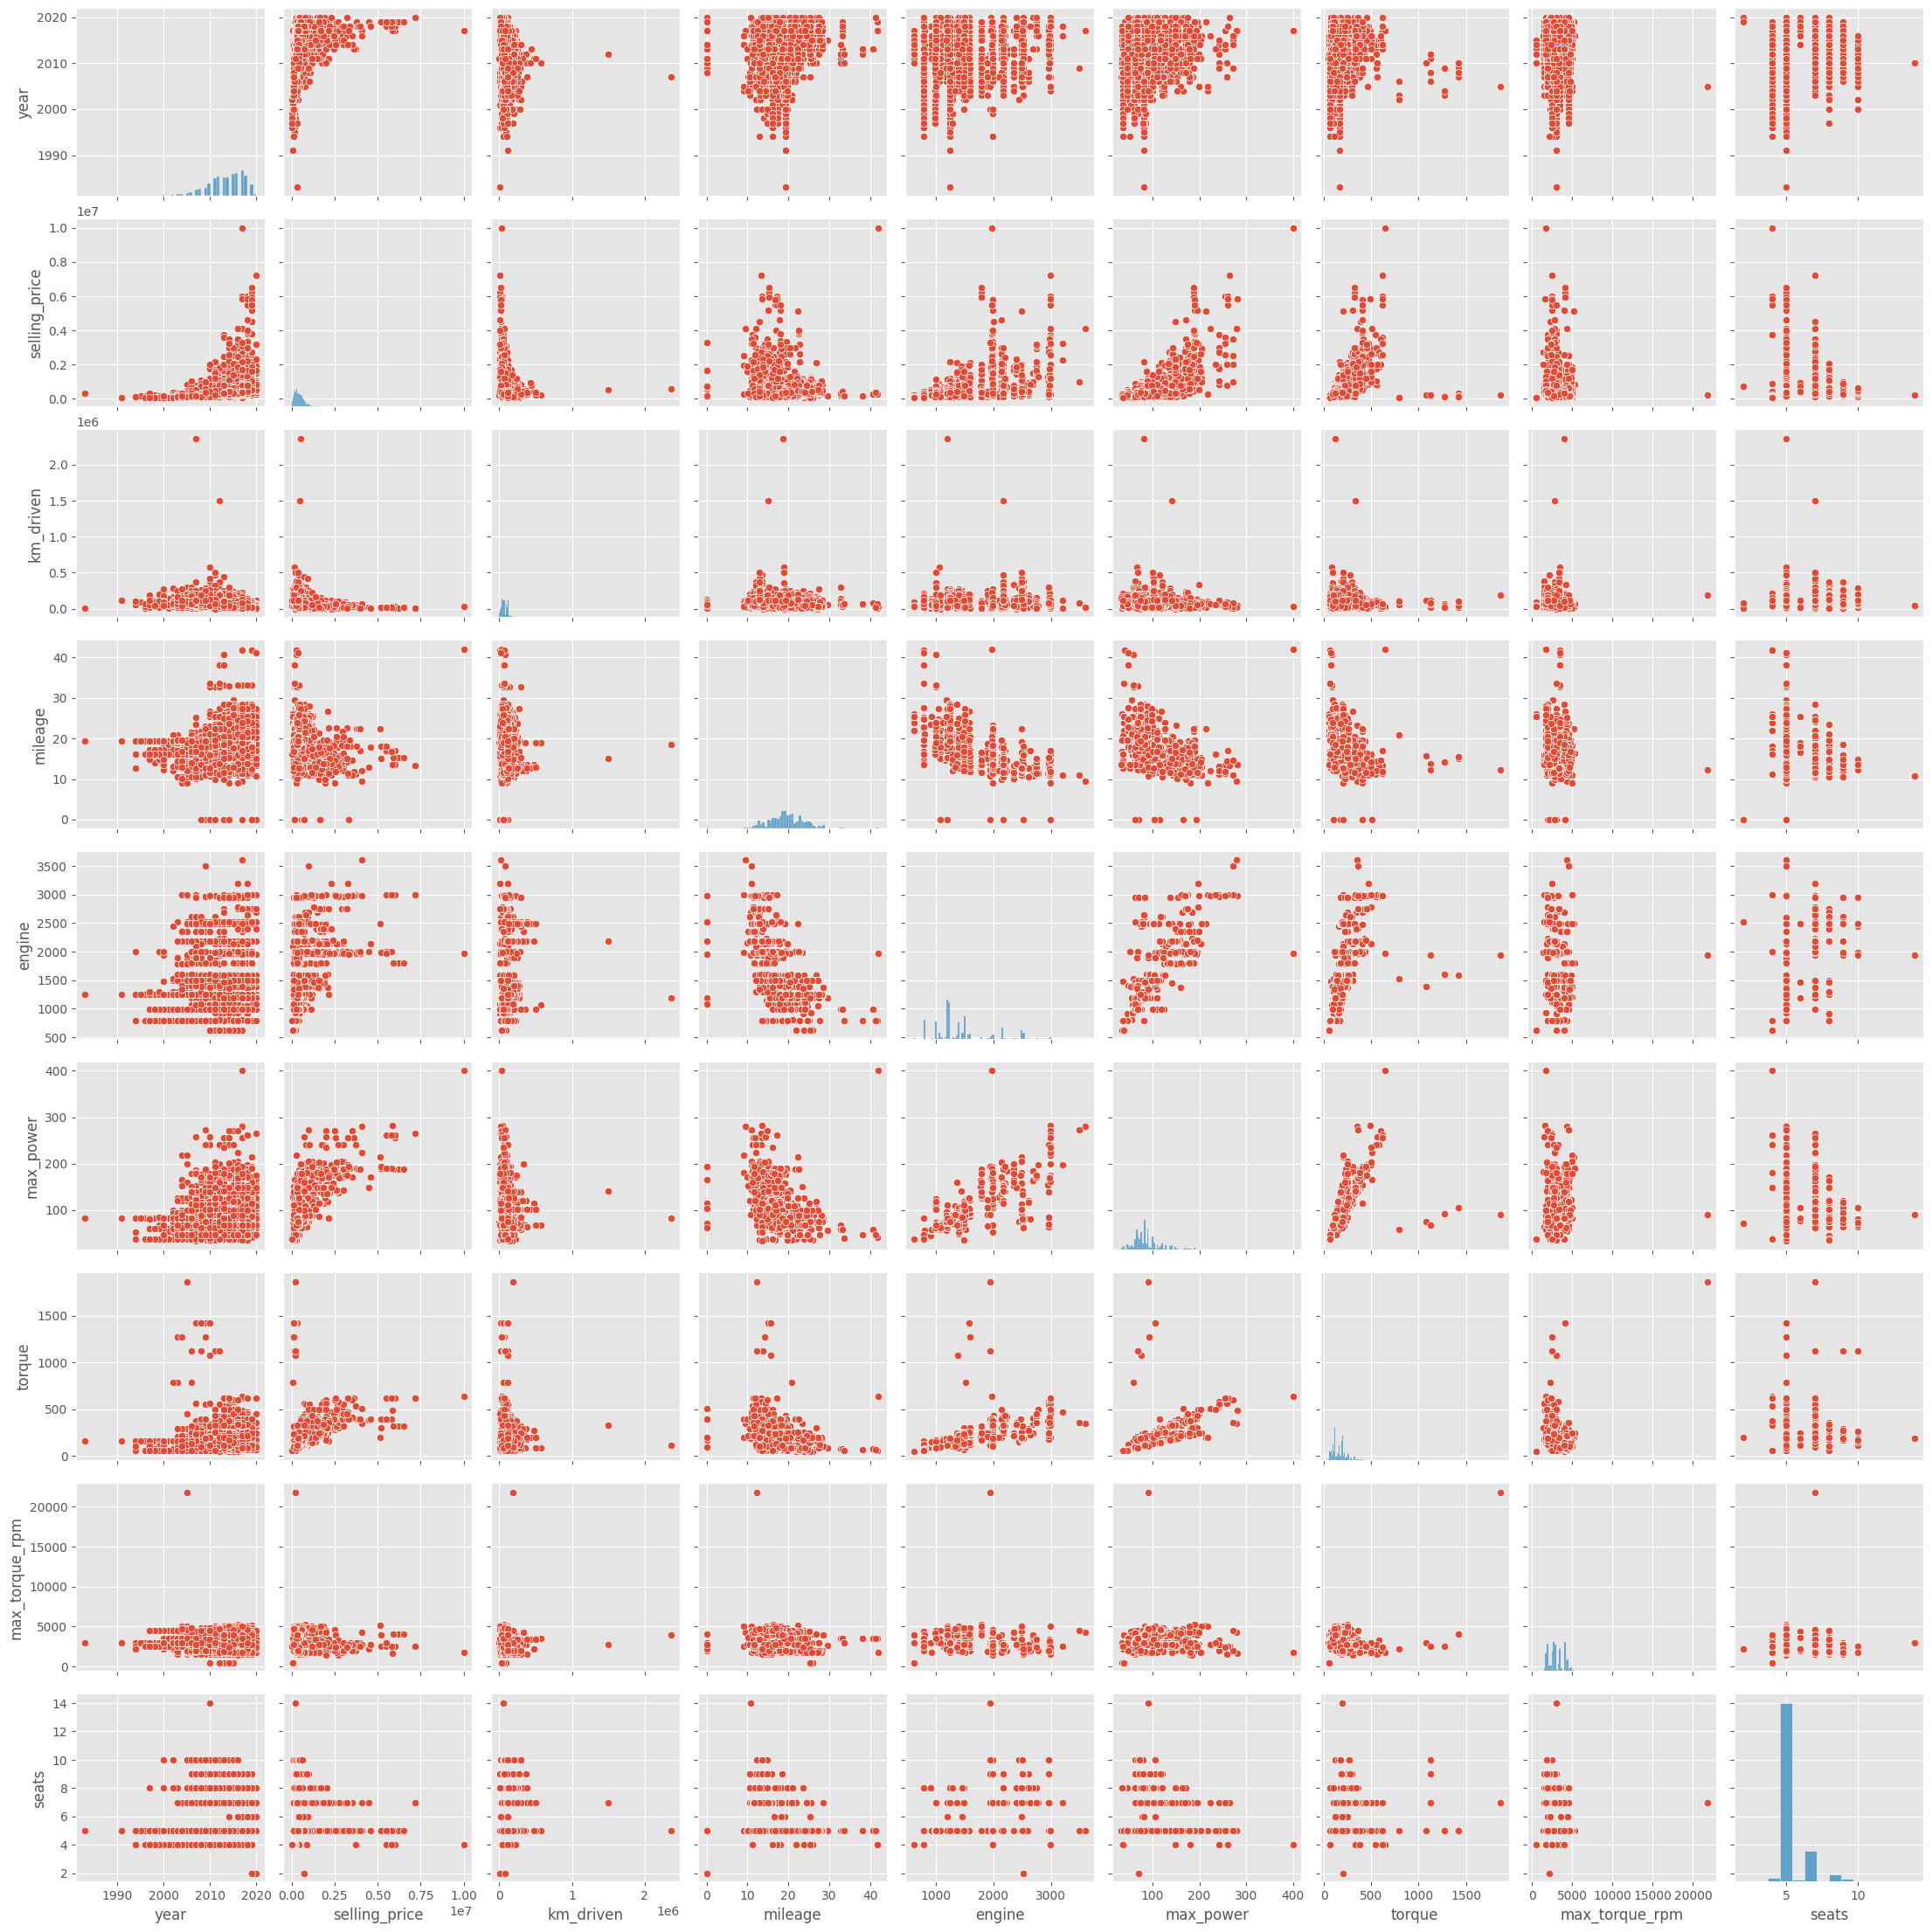

In [63]:
import seaborn as sns
plt.style.use('ggplot')
sns.pairplot(df_train)
plt.show();

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [64]:
print(
    "Хорошо заметна сильная положительная линейная корреляция целевой переменной\n" +
    "с мощностью ДВС (max_power). Есть положительная линейная корреляция\n" +
    "целевой переменной с крутящим моментом ДВС (torque), однако на графике видны\n" +
    "значительные отклонения (точки, лежащие около оси OX далеко от начала координат).\n" +
    "Можно также отметить прямые зависимости целевой переменной от года выпуска (year)\n" +
    "и объема ДВС (engine), но их сложно назвать линейными. В первом случае средняя цена машин с определенным\n" +
    "годом выпуска растет с каждым годом, однако новые машины бывают как дорогие, так и совсем дешевые.\n" +
    "Во втором случае также виден рост средней цены с ростом объема ДВС, но дешевые машины, кажется, можно найти с\n" +
    "любым значением объема ДВС.\n" +
    "У целевой переменной есть обратная зависимость с пробегом (km_driven), но не линейная.\n" + 
    "Корреляции целевой переменной с расходом топлива (mileage), частотой вращения при максимальном\n" +
    "крутящем моменте (max_torque_rpm) и числом мест (seats) не обнаруживаются.\n" +
    "\n" +
    "Примечательные корреляции между признаками:\n"
    "1. Обратные между расходом топлива (mileage) и объемом ДВС (engine), мощностью ДВС (max_power)\n" + 
    "крутящим моментом ДВС (torque) и числом мест (seats);\n"
    "2. Прямые, почти линейные между объемом ДВС (engine) и мощностью ДВС (max_power),\n" +
    "крутящим моментом ДВС (torque);\n" +
    "3. Прямая, почти линейная между мощностью ДВС (max_power) и крутящим моментом ДВС (torque);\n" +
    "4. Частота вращения при максимальном крутящем моменте (max_torque_rpm), кажется, ни с чем не коррелирует."
)

Хорошо заметна сильная положительная линейная корреляция целевой переменной
с мощностью ДВС (max_power). Есть положительная линейная корреляция
целевой переменной с крутящим моментом ДВС (torque), однако на графике видны
значительные отклонения (точки, лежащие около оси OX далеко от начала координат).
Можно также отметить прямые зависимости целевой переменной от года выпуска (year)
и объема ДВС (engine), но их сложно назвать линейными. В первом случае средняя цена машин с определенным
годом выпуска растет с каждым годом, однако новые машины бывают как дорогие, так и совсем дешевые.
Во втором случае также виден рост средней цены с ростом объема ДВС, но дешевые машины, кажется, можно найти с
любым значением объема ДВС.
У целевой переменной есть обратная зависимость с пробегом (km_driven), но не линейная.
Корреляции целевой переменной с расходом топлива (mileage), частотой вращения при максимальном
крутящем моменте (max_torque_rpm) и числом мест (seats) не обнаруживаются.

Примечательные 

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

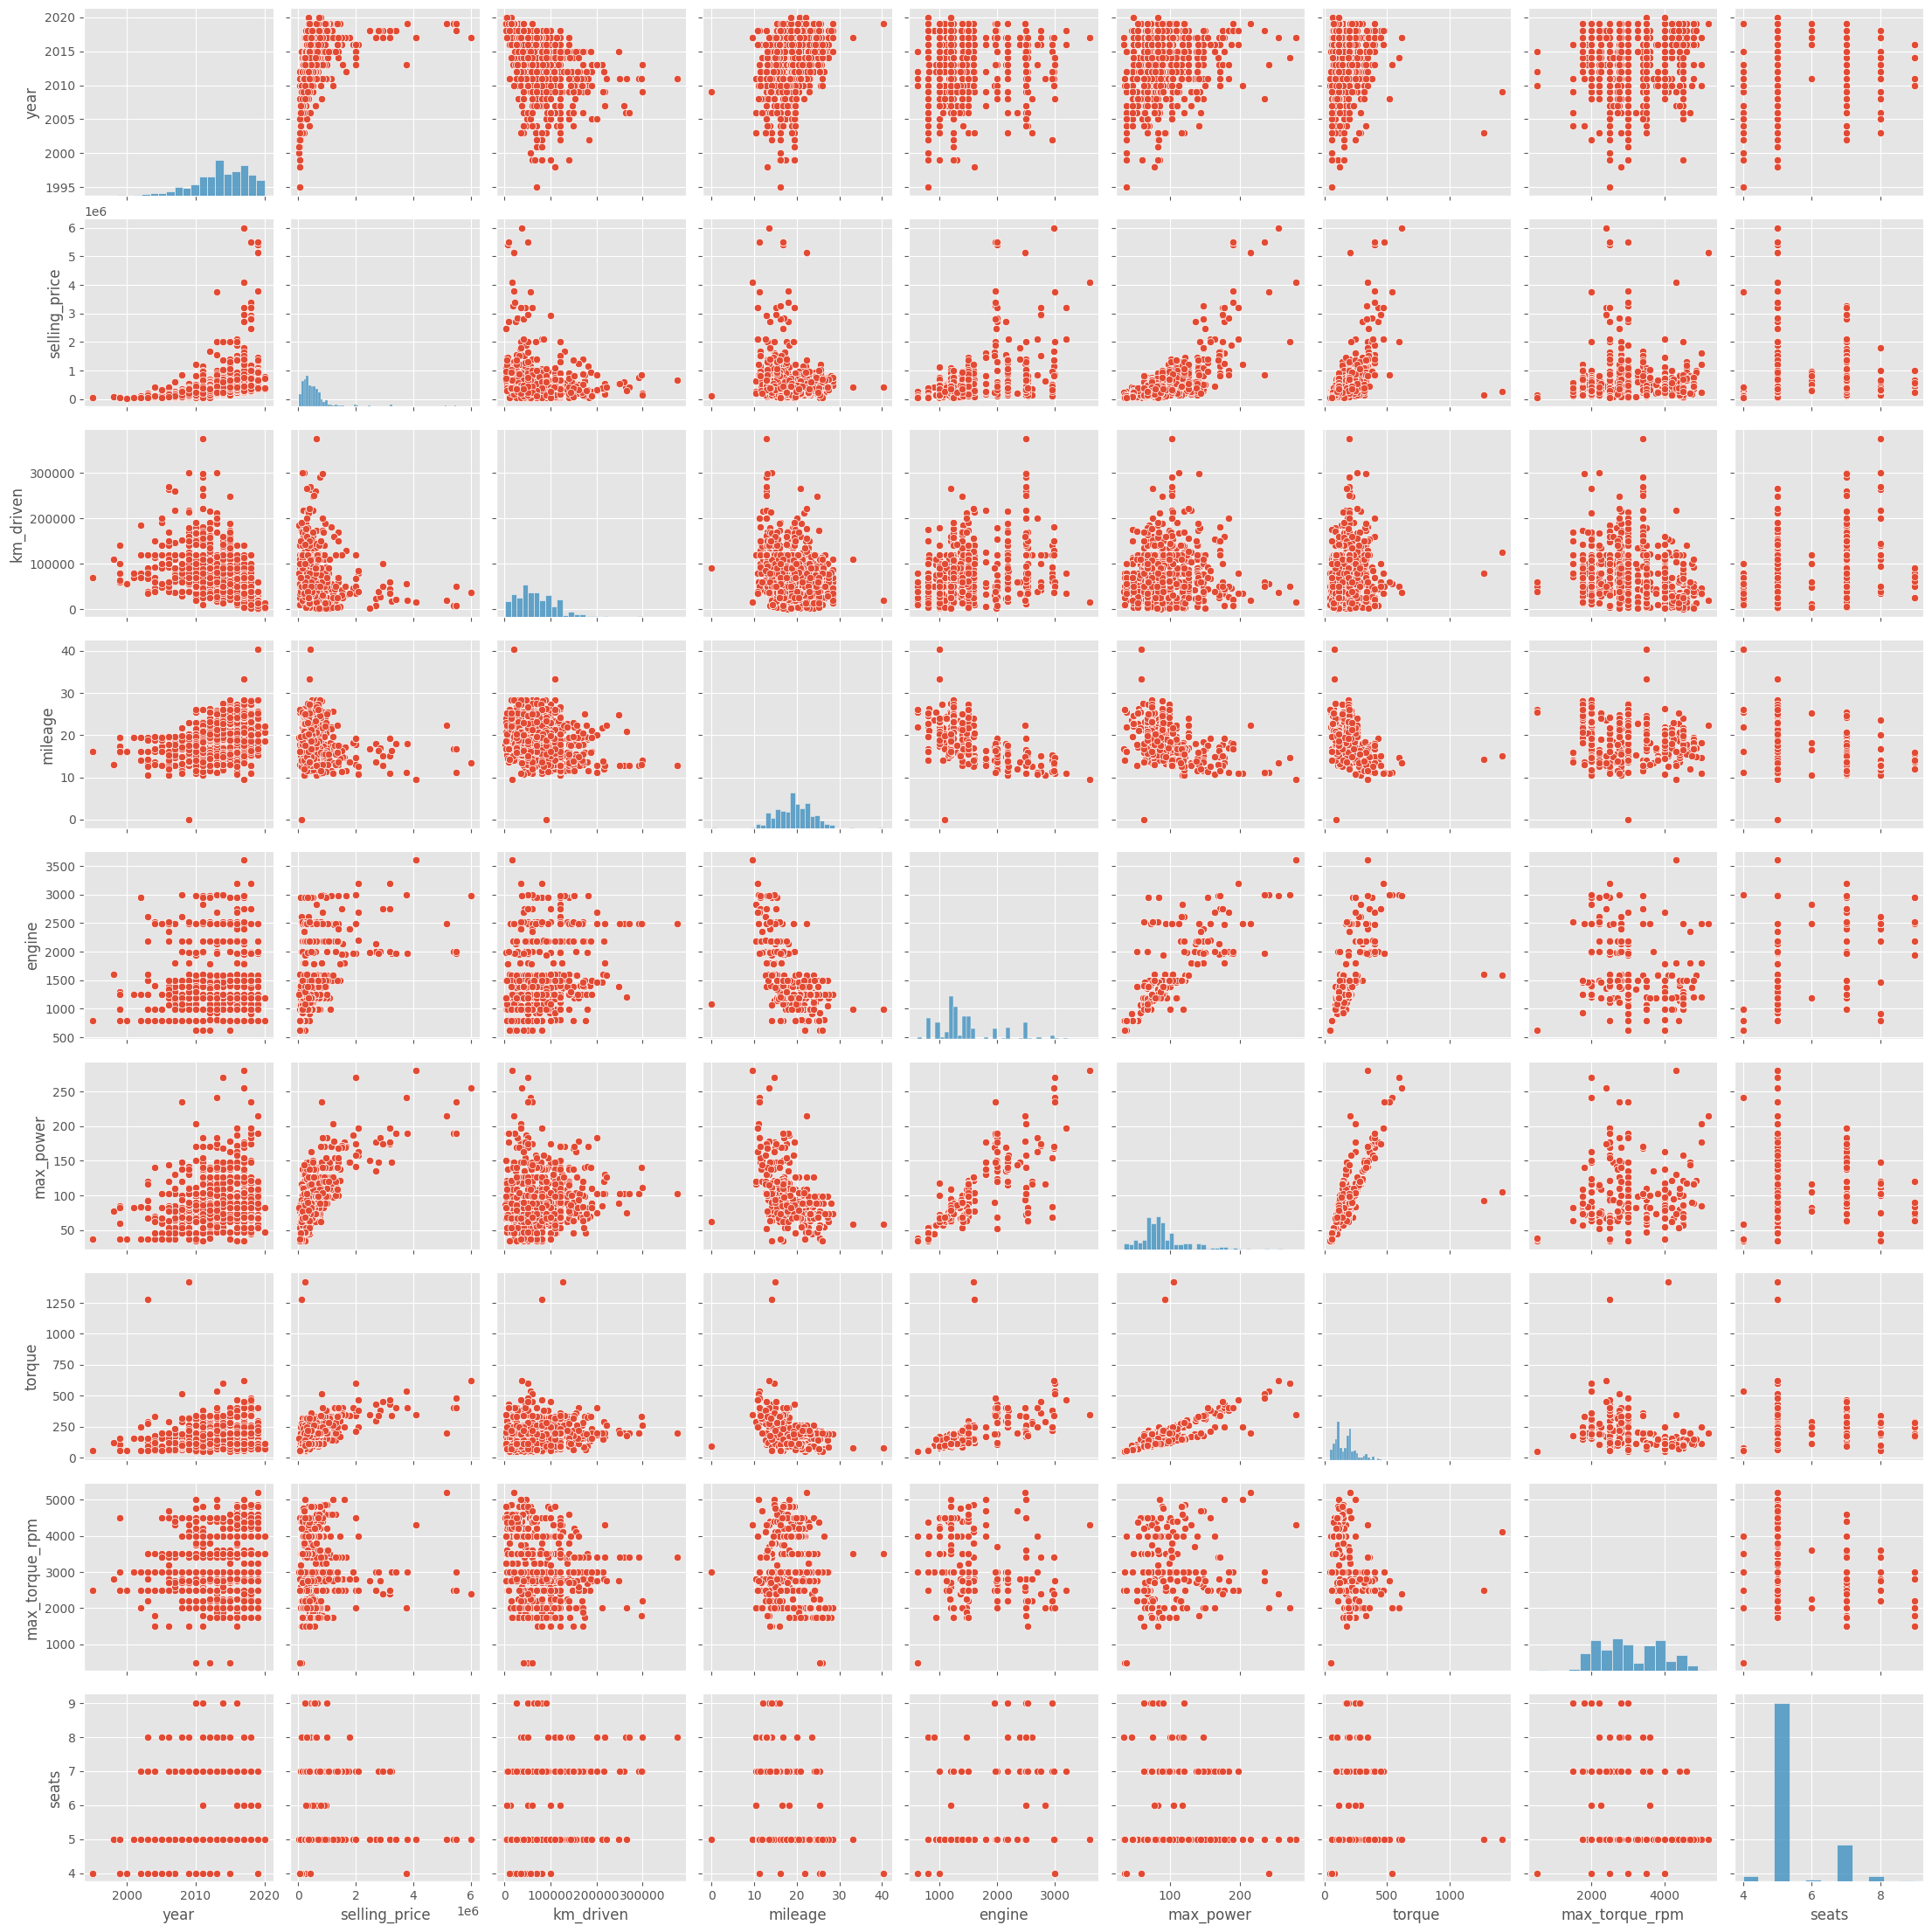

В целом, графики похожи, однако на многих графиках для трейна можно заметить выбросы,
из-за чего основная масса точек на них выглядит «ужатой» в сравнении 
с соответствующими графиками для теста.


In [65]:
sns.pairplot(df_test)
plt.show();
print(
    "В целом, графики похожи, однако на многих графиках для трейна можно заметить выбросы,\n" +
    "из-за чего основная масса точек на них выглядит «ужатой» в сравнении \n" +
    "с соответствующими графиками для теста."
)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

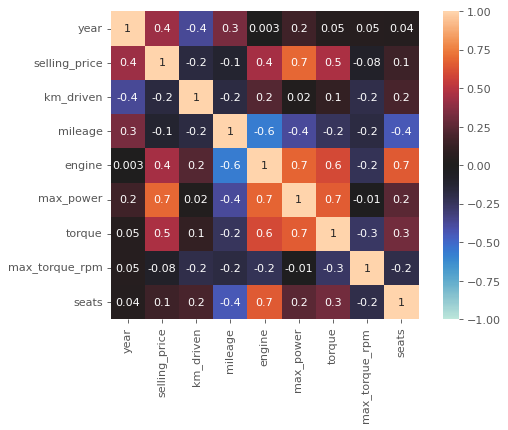

In [66]:
plt.figure(figsize=(8,5), dpi=80)
sns.heatmap(df_train.corr(method='pearson'), annot = True, fmt='.1g', 
            square=True, vmin=-1, vmax=1, center=0)
plt.show();

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [67]:
print(
    "Наименее скоррелированы год выпуска (year) и объем ДВС (engine);\n" +
    "можно сказать, что линейных корреляций между ними нет.\n\n" +
    "Наиболее сильная положительная линейная зависимость\n" +
    "(коэффициент корреляции примерно 0.7) наблюдается у пар:\n" +
    "цена - мощность ДВС \t\t\t(selling_price - max_power),\n" +
    "мощность ДВС - объем ДВС \t\t(max_power - engine),\n" + 
    "мощность ДВС - крутящий момент ДВС \t(max_power - torque),\n" + 
    "крутящий момент ДВС - объем ДВС \t(torque - engine),\n" +
    "количество мест - мощность ДВС \t\t(seats - engine).\n\n" +
    "Между годом и пробегом линейный коэффициент корреляции отрицательный,\n" +
    "хотя и далек от -1 (то есть идеальной линейной зависимости нет).\n" + 
    "Это означает, что чем меньше год, тем, скорее всего, больше пробег, но не обязательно.\n"
     )

Наименее скоррелированы год выпуска (year) и объем ДВС (engine);
можно сказать, что линейных корреляций между ними нет.

Наиболее сильная положительная линейная зависимость
(коэффициент корреляции примерно 0.7) наблюдается у пар:
цена - мощность ДВС 			(selling_price - max_power),
мощность ДВС - объем ДВС 		(max_power - engine),
мощность ДВС - крутящий момент ДВС 	(max_power - torque),
крутящий момент ДВС - объем ДВС 	(torque - engine),
количество мест - мощность ДВС 		(seats - engine).

Между годом и пробегом линейный коэффициент корреляции отрицательный,
хотя и далек от -1 (то есть идеальной линейной зависимости нет).
Это означает, что чем меньше год, тем, скорее всего, больше пробег, но не обязательно.



(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

In [68]:
corr_tmp = df_train.corr(method='pearson')
corr_tmp.drop("selling_price", axis=0, inplace=True) # удаляем целевую переменную
corr_tmp.drop("selling_price", axis=1, inplace=True)
feat1 = corr_tmp[corr_tmp < 1].max().idxmax() # Находим первый признак из наиболее скоррелированной пары
feat2 = corr_tmp[corr_tmp < 1].drop(feat1, axis=0).max(axis=1).idxmax() # Находим второй признак
print(feat1, feat2, corr_tmp[feat1][feat2])

engine max_power 0.6819680141204596


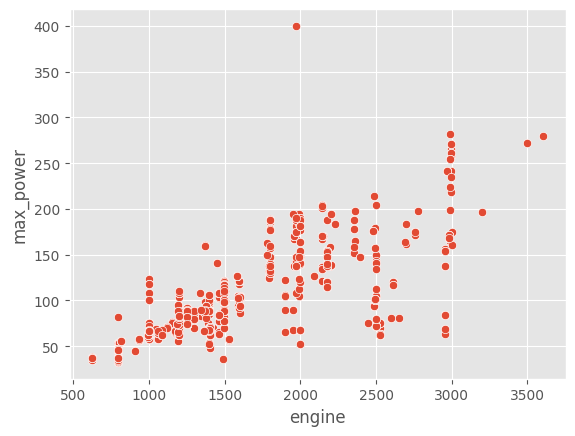

In [69]:
sns.scatterplot(x=df_train[feat1], y=df_train[feat2])
plt.show();

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [70]:
df_train.sample() # Выведем для удобства, чтобы столбцы были перед глазами.

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,max_torque_rpm,seats
1205,Maruti Ertiga SHVS ZDI Plus,2017,750000,100000,Diesel,Individual,Manual,First Owner,24.52,1248,88.5,200.0,1750.0,7


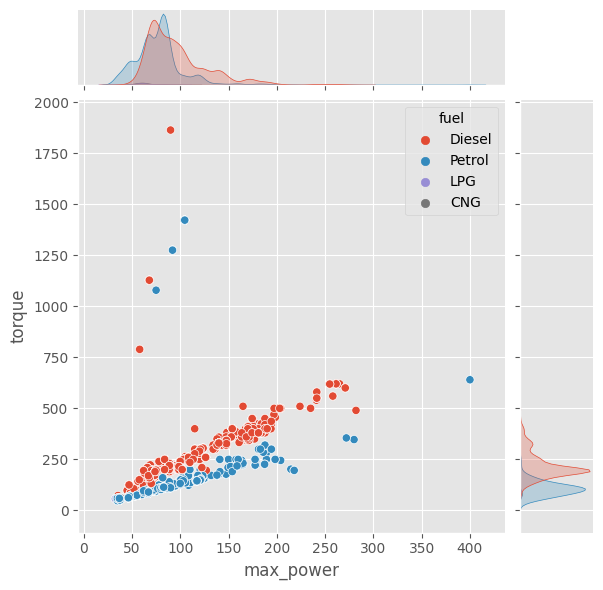

In [72]:
# При фиксированном топливе зависимость мощности ДВС (max_power) от объема ДВС (torque),
# кажется, почти линейная. Также для бензина (Petrol) характерны меньшие значения torque,
# чем для дизеля (Diesel) при фиксированной мощности.
sns.jointplot(data=df_train, x="max_power", y="torque", hue="fuel")
plt.show();

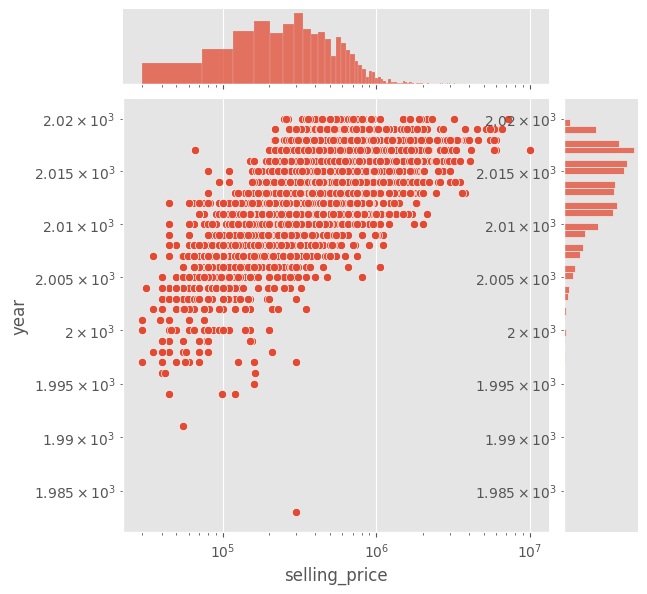

In [127]:
# Есть очень сильная линейная корреляция между логарифмами года выпуска и целевой переменной.
g = sns.jointplot(data=df_train, x="selling_price", y="year")
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')
plt.show();

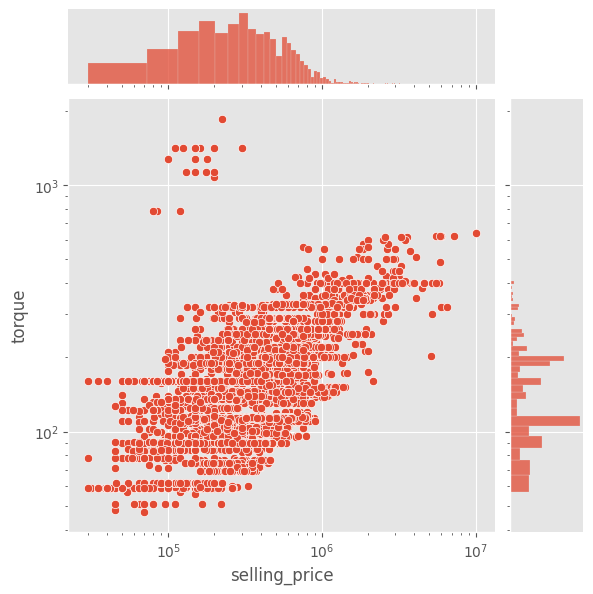

In [73]:
# Есть корреляция между логарифмами объема ДВС и целевой переменной.
g = sns.jointplot(data=df_train, x="selling_price", y="torque")
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')
plt.show();

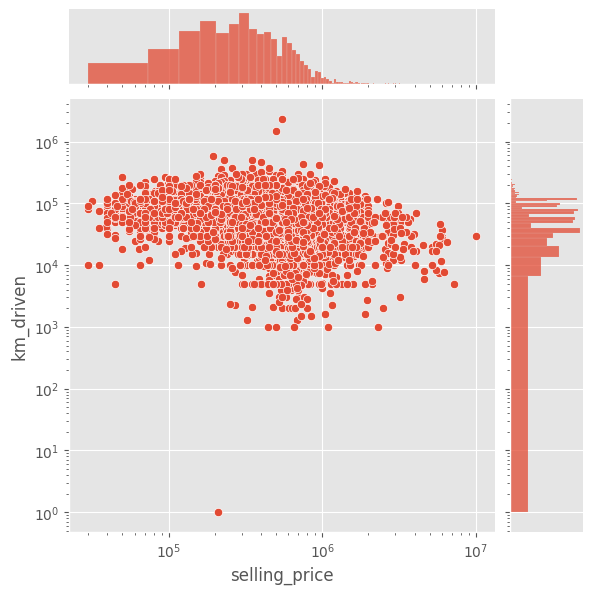

In [74]:
g = sns.jointplot(data=df_train, x="selling_price", y="km_driven")
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')
plt.show();

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [75]:
df_train = df_train.astype({'fuel': 'category', 'seller_type': 'category', 
                            'transmission': 'category', 'owner': 'category'})
df_train.dtypes

name                object
year                 int64
selling_price        int64
km_driven            int64
fuel              category
seller_type       category
transmission      category
owner             category
mileage            float64
engine               int32
max_power          float64
torque             float64
max_torque_rpm     float64
seats                int32
dtype: object

In [76]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(exclude=["category"]).drop(['selling_price', 'name'], axis=1)

In [77]:
X_train

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,seats
0,2014,145500,23.40,1248,74.00,190.00000,2000.0,5
1,2014,120000,21.14,1498,103.52,250.00000,2500.0,5
2,2010,127000,23.00,1396,90.00,219.67008,2750.0,5
3,2007,120000,16.10,1298,88.20,112.77705,4500.0,5
4,2017,45000,20.14,1197,81.86,113.75000,4000.0,5
...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.10000,3000.0,5
5836,2013,50000,18.90,998,67.10,90.00000,3500.0,5
5837,2013,110000,18.50,1197,82.85,113.70000,4000.0,5
5838,2007,119000,16.80,1493,110.00,235.36080,2750.0,5


In [78]:
assert X_train.shape == (5840, 8)

In [79]:
df_test = df_test.astype({'fuel': 'category', 'seller_type': 'category',
                          'transmission': 'category', 'owner': 'category'})

In [80]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(exclude=["category"]).drop(['selling_price', 'name'], axis=1)

In [81]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [83]:
pred_mse_train = model.predict(X_train)
MSE(y_train, pred_mse_train)

114049732541.02672

In [84]:
r2_score(y_train, pred_mse_train)

0.6021127766983208

In [85]:
pred_mse_test = model.predict(X_test)
MSE(y_test, pred_mse_test)

229298761875.37225

In [86]:
r2_score(y_test, pred_mse_test) # R2 для теста очень близко к R2 для трейна.

0.601100607083277

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [87]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()

normalizer.fit(X_train)

X_train_scaled = normalizer.transform(X_train)
X_test_scaled = normalizer.transform(X_test)

In [88]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

pred_mse_train = model.predict(X_train_scaled)
pred_mse_test = model.predict(X_test_scaled)

print(
    "MSE на X_train_scaled: ", MSE(y_train, pred_mse_train), "\n",
    "R2 на X_train_scaled: ", r2_score(y_train, pred_mse_train), "\n",
    
    "MSE на X_test_scaled: ", MSE(y_test, pred_mse_test), "\n",
    "R2 на X_test_scaled: ", r2_score(y_test, pred_mse_test), "\n",
    sep=''
)

MSE на X_train_scaled: 114049732541.02652
R2 на X_train_scaled: 0.6021127766983214
MSE на X_test_scaled: 229298761875.3727
R2 на X_test_scaled: 0.6011006070832761



Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [89]:
print(model.coef_)

print(model.intercept_) #w0

[163545.52464034 -48857.38241961  -4077.88041583  22801.34731166
 331921.76275408   6348.45849093 -57888.01423854 -28091.24529774]
522960.09109588654


In [90]:
# Находим индекс максимального значения среди весов и берем название столбца с этим индексом
X_train.columns[np.argmax(model.coef_)] 

'max_power'

In [91]:
print("Наиболее информативным признаком оказалась максимальная мощность ДВС (max_power).")

Наиболее информативным признаком оказалась максимальная мощность ДВС (max_power).


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [92]:
from sklearn.linear_model import Lasso

model_l1 = Lasso(alpha=1)

model_l1.fit(X_train_scaled, y_train)

pred_l1 = model_l1.predict(X_test_scaled)

print(r2_score(y_test, pred_l1))

0.6010993305470693


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [93]:
print(model_l1.coef_)

print(model_l1.intercept_) #w0

[163543.38386194 -48856.44872881  -4074.75333655  22799.16118277
 331923.20456437   6347.84810159 -57886.04388506 -28087.29136912]
522960.09109588654


In [94]:
print(
    "L1-регуляризация практически не повлияла на веса модели (а значит и ее точность),\n" +
    "поскольку модель до регуляризации, судя по всему, не была переобучена; все веса оказались важны,\n" +
    "поэтому ни один из них не занулился."
)

L1-регуляризация практически не повлияла на веса модели (а значит и ее точность),
поскольку модель до регуляризации, судя по всему, не была переобучена; все веса оказались важны,
поэтому ни один из них не занулился.


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [95]:
from sklearn.model_selection import GridSearchCV
nfolds = 10

model_l1 = Lasso()
clf = GridSearchCV(
    estimator=model_l1,
    param_grid={'alpha': np.arange(0.1, 30000, 10)},
    cv=nfolds,
    scoring='r2',
    verbose=1,
)

clf.fit(X_train_scaled, y_train)
clf.best_params_

Fitting 10 folds for each of 3000 candidates, totalling 30000 fits


{'alpha': 21560.1}

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [96]:
t_f = np.sum(clf.cv_results_['mean_fit_time']*nfolds)
t_s = np.sum(clf.cv_results_['mean_score_time']*nfolds)
t_t = t_f + t_s
print(
    f"Пришлось обучать 30000 моделей: 10 фолдов (кросс-валидация)\n" + 
    f"для каждого из 3000 значений параметра alpha (от 0.1 до 30000 с шагом 10).\n\n" +
    f"На обучение моделей ушло \t\t{'%.3f' % t_f} секунды.\n" + 
    f"На оценку моделей ушло \t\t\t{'%.3f' % t_s} секунды.\n" +
    f"На обучение и оценку моделей ушло \t{'%.3f' % t_t} секунды."
)

Пришлось обучать 30000 моделей: 10 фолдов (кросс-валидация)
для каждого из 3000 значений параметра alpha (от 0.1 до 30000 с шагом 10).

На обучение моделей ушло 		41.684 секунды.
На оценку моделей ушло 			10.108 секунды.
На обучение и оценку моделей ушло 	51.792 секунды.


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [97]:
model_l1 = Lasso(alpha=clf.best_params_['alpha'])
model_l1.fit(X_train_scaled, y_train)
pred_l1 = model_l1.predict(X_test_scaled)
print(r2_score(y_test, pred_l1))

0.5750386550119486


In [98]:
mask = (np.abs(model_l1.coef_) <= 1e-6) # Маска для нахождения зануленных весов
print(model_l1.coef_)
print(model_l1.intercept_)
X_test.columns[mask] # Смотрим названия признаков с зануленными весами 

[147562.88546554 -26617.19005472      0.              0.
 327016.49625336      0.         -31874.36376182     -0.        ]
522960.0910958869


Index(['mileage', 'engine', 'torque', 'seats'], dtype='object')

In [99]:
X_test.columns[~mask]

Index(['year', 'km_driven', 'max_power', 'max_torque_rpm'], dtype='object')

In [100]:
print(
    f"Коэффициент регуляризации у лучшей из моделей: {clf.best_params_['alpha']}.\n" +
    "Занулилось 4 веса: у признаков mileage, engine, torque и seats.\n" +
    "Оценка на тестовом датасете, однако, ухудшилась (без рег. r2=0.601, с рег. r2=0.575)."
)

Коэффициент регуляризации у лучшей из моделей: 21560.1.
Занулилось 4 веса: у признаков mileage, engine, torque и seats.
Оценка на тестовом датасете, однако, ухудшилась (без рег. r2=0.601, с рег. r2=0.575).


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [101]:
from sklearn.linear_model import ElasticNet
nfolds = 10

model_en = ElasticNet()
clf = GridSearchCV(
    estimator=model_en,
    param_grid={
        'alpha': np.linspace(0.1, 30000, 300),
        'l1_ratio': np.linspace(0.1, 1., 10)
    },
    cv=nfolds,
    scoring='r2',
    verbose=1,
)

clf.fit(X_train_scaled, y_train)
clf.best_params_

Fitting 10 folds for each of 3000 candidates, totalling 30000 fits


{'alpha': 21571.934448160537, 'l1_ratio': 1.0}

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [102]:
print(
    "l1_ratio = 1, что соответствует L1-регуляризации (Lasso).\n" +
    f"alpha примерно такой же, как мы получили ранее (немного отличается из-за другого шага): {'%.1f' % clf.best_params_['alpha']}."
)

l1_ratio = 1, что соответствует L1-регуляризации (Lasso).
alpha примерно такой же, как мы получили ранее (немного отличается из-за другого шага): 21571.9.


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [103]:
X_train_cat = pd.concat([df_train.select_dtypes(include=["category"]), df_train['seats']], axis=1)
X_train_cat = X_train_cat.astype({'seats': 'category'})
X_train_cat.dtypes

fuel            category
seller_type     category
transmission    category
owner           category
seats           category
dtype: object

In [104]:
X_train_cat.sample(3)

,fuel,seller_type,transmission,owner,seats
4955,Diesel,Individual,Manual,First Owner,8
2869,Diesel,Dealer,Manual,Second Owner,5
920,Petrol,Individual,Manual,Second Owner,5


In [105]:
X_train_cat.describe(include='category')

,fuel,seller_type,transmission,owner,seats
count,5840,5840,5840,5840,5840
unique,4,3,2,5,9
top,Diesel,Individual,Manual,First Owner,5
freq,3177,5223,5336,3603,4618


In [106]:
X_test_cat = pd.concat([df_test.select_dtypes(include=["category"]), df_test['seats']], axis=1)
X_test_cat = X_test_cat.astype({'seats': 'category'})
X_test_cat.describe(include='category')

,fuel,seller_type,transmission,owner,seats
count,1000,1000,1000,1000,1000
unique,4,3,2,5,6
top,Diesel,Individual,Manual,First Owner,5
freq,534,837,877,623,777


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [107]:
# Посмотрим на уникальные категории каждого из категориальных признаков в трейне и тесте
for col in X_train_cat:
    print(f"{col}, TRAIN:\t", np.array(X_train_cat[col].unique()))
    print(f"{col}, TEST:\t", np.array(X_test_cat[col].unique()))
    print()

fuel, TRAIN:	 ['Diesel' 'Petrol' 'LPG' 'CNG']
fuel, TEST:	 ['Diesel' 'Petrol' 'CNG' 'LPG']

seller_type, TRAIN:	 ['Individual' 'Dealer' 'Trustmark Dealer']
seller_type, TEST:	 ['Individual' 'Dealer' 'Trustmark Dealer']

transmission, TRAIN:	 ['Manual' 'Automatic']
transmission, TEST:	 ['Manual' 'Automatic']

owner, TRAIN:	 ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
owner, TEST:	 ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']

seats, TRAIN:	 [ 5  4  7  8  6  9 10 14  2]
seats, TEST:	 [7 5 6 4 8 9]



In [108]:
print(
    "В owner перечислены все возможные варианты, поэтому точно можем\n" + 
    "избавиться от одного столбца. В transmission и seller_type, скорее всего, тоже.\n" +
    "Небольшие сомнения вызывает вид топлива (fuel), но поскольку самые частые значения \n" +
    "'Diesel' и 'Petrol' (как было выяснено во время визуализаций), а остальные встречаются\n" +
    "очень редко, то, наверное, от одного столбца можно избавиться и в этом случае.\n" +
    "Очевидно, для числа мест в трейне представлены не все возможные варианты; в тесте их еще меньше.\n" +
    "Однако некоторые из значений в трейне (10, 14) редкие, поэтому если отбросим один столбец,\n" +
    "то почти наверняка ничего не потеряем."
)

В owner перечислены все возможные варианты, поэтому точно можем
избавиться от одного столбца. В transmission и seller_type, скорее всего, тоже.
Небольшие сомнения вызывает вид топлива (fuel), но поскольку самые частые значения 
'Diesel' и 'Petrol' (как было выяснено во время визуализаций), а остальные встречаются
очень редко, то, наверное, от одного столбца можно избавиться и в этом случае.
Очевидно, для числа мест в трейне представлены не все возможные варианты; в тесте их еще меньше.
Однако некоторые из значений в трейне (10, 14) редкие, поэтому если отбросим один столбец,
то почти наверняка ничего не потеряем.


In [109]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')

ohe.fit(X_train_cat)
ohe.categories_

[array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
        'Test Drive Car', 'Third Owner'], dtype=object),
 array([ 2,  4,  5,  6,  7,  8,  9, 10, 14], dtype=int64)]

In [110]:
# Объединим численные и закодированные категориальные признаки в единый numpy-массив
X_train_ohe = ohe.transform(X_train_cat).toarray()
X_train_ohe = np.concatenate([X_train.drop('seats', axis=1), X_train_ohe], axis=1)
X_train_ohe.shape

(5840, 25)

In [111]:
# То же для теста
X_test_ohe = ohe.transform(X_test_cat).toarray()
X_test_ohe = np.concatenate([X_test.drop('seats', axis=1), X_test_ohe], axis=1)
X_test_ohe.shape

(1000, 25)

In [112]:
# Нормализуем
normalizer = StandardScaler()
normalizer.fit(X_train_ohe)
X_train_ohe_scaled = normalizer.transform(X_train_ohe)
X_test_ohe_scaled = normalizer.transform(X_test_ohe)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [113]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

nfolds = 10

model_l2 = Ridge()
clf = GridSearchCV(
    estimator=model_l2,
    param_grid={'alpha': np.arange(0.1, 30000, 10)},
    cv=nfolds,
    scoring='r2',
    verbose=1,
)

clf.fit(X_train_ohe_scaled, y_train)
clf.best_params_

Fitting 10 folds for each of 3000 candidates, totalling 30000 fits


{'alpha': 480.1}

In [114]:
model_l2 = Ridge(alpha=clf.best_params_['alpha'])
model_l2.fit(X_train_ohe_scaled, y_train)
pred_l2 = model_l2.predict(X_test_ohe_scaled)
print("%.4f" % r2_score(y_test, pred_l2))

0.6201


In [115]:
# Посмотрим еще без регуляризации
model = LinearRegression()
model.fit(X_train_ohe_scaled, y_train)
pred = model.predict(X_test_ohe_scaled)
print("%.4f" % r2_score(y_test, pred))

0.6322


In [116]:
print("Качество предсказаний незначительно улучшилось (r2 на тесте стал больше примерно на 0.02,\n" +
      "чем r2 на тесте модели без категориальных признаков и без регуляризации).\n"
      "К слову, без регуляризации r2 на тесте еще больше (на 0.01)."
)

Качество предсказаний незначительно улучшилось (r2 на тесте стал больше примерно на 0.02,
чем r2 на тесте модели без категориальных признаков и без регуляризации).
К слову, без регуляризации r2 на тесте еще больше (на 0.01).


# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [117]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [118]:
model_l2 = Ridge(alpha=470)
model_l2.fit(X_train_ohe_scaled, y_train)
pred_l2_test = model_l2.predict(X_test_ohe_scaled)

In [119]:
def business_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sum((y_pred >= 0.9*y_true) & (y_pred <= 1.1*y_true)) / y_pred.shape[0]

business_metrics(y_test, pred_l2_test)

0.235

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [120]:
# Напоследок обучим еще раз imputer, one-hot encoder, scaler и саму модель 
# (чтобы не запутаться и сохранить именно то, что нам нужно).

tmp_df_train = df_train.select_dtypes(exclude=["category"]).drop(['selling_price', 'name', 'seats'], axis=1)
mis_replacer = impute.SimpleImputer(strategy="median")
mis_replacer.fit(tmp_df_train) 

ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(X_train_cat)
X_train_ohe = ohe.transform(X_train_cat).toarray()
X_train_ohe = np.concatenate([X_train.drop('seats', axis=1), X_train_ohe], axis=1)

normalizer = StandardScaler()
normalizer.fit(X_train_ohe)
X_train_ohe_scaled = normalizer.transform(X_train_ohe)

model_l2 = Ridge(alpha=470)
model_l2.fit(X_train_ohe_scaled, y_train)

Ridge(alpha=470)

In [121]:
# Сохраним в .pickle веса и прочее. Версия scikit-learn 1.0.2 (это важно!)
import pickle

data = {
    'model': model_l2,
    'normalizer': normalizer,
    'one_hot_encoder': ohe,
    'imputer': mis_replacer
}

with open('VehiclePriceModel.pickle', 'wb') as f:
    pickle.dump(data, f)

In [122]:
# Шаблон, который здесь был:
# from fastapi import FastAPI
# from pydantic import BaseModel
# from typing import List

# app = FastAPI()


# class Item(BaseModel):
#     name: str
#     year: int
#     selling_price: int
#     km_driven: int
#     fuel: str
#     seller_type: str
#     transmission: str
#     owner: str
#     mileage: str 
#     engine: str
#     max_power: str
#     torque: str
#     seats: float


# class Items(BaseModel):
#     objects: List[Item]


# @app.post("/predict_item")
# def predict_item(item: Item) -> float:
#     return ...


# @app.post("/predict_items")
# def predict_items(items: List[Item]) -> List[float]:
#     return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link